# TrafikiPy

## File Setup: Data Import + Cleaning

In [6]:
# ----------------------------------------------------------------------
# **Part 1: File Set Up**
# ----------------------------------------------------------------------

#===========DEPENDENCIES=============
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests
from datetime import datetime


pd.set_option('display.max_columns', None)


# define function to convert to hourly time 
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

In [7]:
#============IMPORT==============
csv_file_path = os.path.join('Resources', 'accidents_2014.csv')
traffic_df = pd.read_csv(csv_file_path)

In [8]:
#============DROP BLANK COLUMNS===========

traffic_df.dropna(
    axis=1,
    how='all',
    inplace=True
)

#============DROP BLANK ROWS WITH BLANK VALUES==========

traffic_df['Junction_Control'].replace(
    np.nan, 'None', inplace=True)

traffic_df.replace(
    '', np.nan, inplace=True)

traffic_df.replace(
    'Unknown', np.nan, inplace=True)

traffic_df.dropna(axis=0, inplace=True)

#===========REPLACING ERRANT/MISPELLED VALUES===============

traffic_df['Light_Conditions'].replace(
    'Darkeness: No street lighting',
    'Darkness: No street lighting', 
    inplace=True
)

traffic_df['Pedestrian_Crossing-Physical_Facilities'].replace(
    'non-junction pedestrian crossing',
    'Non-junction Pedestrian Crossing', 
    inplace=True
)

#===========RENAMING COLUMNS===============

traffic_df.rename(columns=
    {'Accident_Index' : 'Accident Index',
     'Longitude' : 'Longitude', 
     'Latitude' : 'Latitude', 
     'Police_Force' : 'Police Force', 
     'Accident_Severity' : 'Accident Severity', 
     'Number_of_Vehicles' : 'Number of Vehicles', 
     'Number_of_Casualties' : 'Number of Casualties', 
     'Date' : 'Date', 
     'Day_of_Week' : 'Day of Week', 
     'Time' : 'Time', 
     'Local_Authority_(District)' : 'Local Authority District', 
     'Local_Authority_(Highway)' : 'Local Authority Highway', 
     '1st_Road_Class' : '1st Road Class', 
     '1st_Road_Number' : '1st Road Number', 
     'Road_Type' : 'Road Type', 
     'Speed_limit' : 'Speed Limit', 
     'Junction_Control' : 'Junction Control', 
     '2nd_Road_Class' : '2nd Road Class', 
     '2nd_Road_Number' : '2nd Road Number', 
     'Pedestrian_Crossing-Human_Control' : 'Pedestrian Crossing Human Control', 
     'Pedestrian_Crossing-Physical_Facilities' : 'Pedestrian Crossing Physical Facilities', 
     'Light_Conditions' : 'Light Conditions', 
     'Weather_Conditions' : 'Weather Conditions', 
     'Road_Surface_Conditions' : 'Road Surface Conditions', 
     'Special_Conditions_at_Site' : 'Special Conditions at Site', 
     'Carriageway_Hazards' : 'Carriageway Hazards', 
     'Urban_or_Rural_Area' : 'Urban or Rural Area', 
     'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Attended Scene of Accident', 
     'LSOA_of_Accident_Location' : 'LSOA of Accident Location', 
     'Year' : 'Year', 
    }, inplace=True)

# format Date in Datetime format and add additional columns for month, day, and hour
traffic_df['Date'] = pd.to_datetime(traffic_df['Date'], format='%d/%m/%y')
traffic_df['Month'] = traffic_df['Date'].dt.month
traffic_df['Day'] = traffic_df['Date'].dt.day
traffic_df['Hour of Day'] = traffic_df['Time'].apply(to_hour)

# display cleaned file
traffic_df.head()

,Accident Index,Longitude,Latitude,Police Force,Accident Severity,Number of Vehicles,Number of Casualties,Date,Day of Week,Time,Local Authority District,Local Authority Highway,1st Road Class,1st Road Number,Road Type,Speed Limit,Junction Control,2nd Road Class,2nd Road Number,Pedestrian Crossing Human Control,Pedestrian Crossing Physical Facilities,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site,Carriageway Hazards,Urban or Rural Area,Police Attended Scene of Accident,LSOA of Accident Location,Year,Month,Day,Hour of Day
0,201401BS70001,-0.206443,51.496345,1,3,2,1,2014-01-09,5,13:21,12,E09000020,3,315,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,No,E01002814,2014,1,9,13
1,201401BS70006,-0.171308,51.495892,1,3,2,1,2014-01-09,5,8:50,12,E09000020,3,4,Single carriageway,30,Giveway or uncontrolled,3,4,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2014,1,9,8
2,201401BS70009,-0.201326,51.498245,1,3,2,1,2014-01-10,6,18:25,12,E09000020,3,315,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002817,2014,1,10,18
3,201401BS70011,-0.207445,51.507511,1,3,2,1,2014-01-10,6,10:55,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002871,2014,1,10,10
4,201401BS70013,-0.179731,51.497822,1,3,2,1,2014-01-05,1,20:26,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,5,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002892,2014,1,5,20


## Report Formatting
To ensure that our report would have a cohesive look and feel, we established color palettes to use across all visualizations.

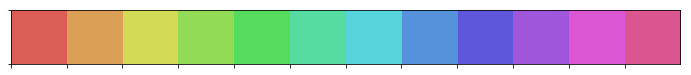

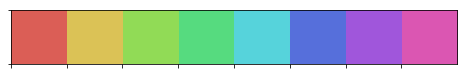

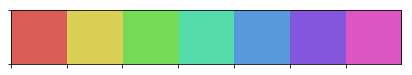

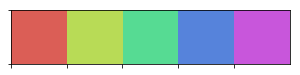

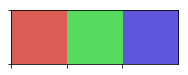

In [9]:
# ----------------------------------------------------------------------
# **Part 2: Set up overall formatting**
# ----------------------------------------------------------------------
# create color palette with 12 colors (for use with monthly data)
twelveColorPalette = sns.color_palette('hls', 12)
twelve = sns.palplot(twelveColorPalette)
plt.savefig('Images/twelveColorPalette.png')

# create color palette with 8 colors (for use with weather conditions)
eightColorPalette = sns.color_palette('hls', 8)
eight = sns.palplot(eightColorPalette)
plt.savefig('Images/eightColorPalette.png')

# create color palette with 7 colors (for use with day of the week analysis)
sevenColorPalette = sns.color_palette('hls', 7)
seven = sns.palplot(sevenColorPalette)
plt.savefig('Images/sevenColorPalette.png')

# create color palette with 5 colors (for use with road/light conditions)
fiveColorPalette = sns.color_palette('hls', 5)
five = sns.palplot(fiveColorPalette)
plt.savefig('Images/fiveColorPalette.png')

# create color palette with 3 colors (for data by severity)
threeColorPalette = sns.color_palette('hls', 3)
three = sns.palplot(threeColorPalette)
plt.savefig('Images/threeColorPalette.png')

# display color palettes
plt.show(three)
plt.show(five)
plt.show(seven)
plt.show(eight)
plt.show(twelve)

# Basic Data Visualization
## Geographic Visualization of Accidents in the UK
To get a sense of our overall dataset, we created a geographic visualization 
using Plot.ly to create a scatterplot on a map of the United Kingdom.

Upon doing so, we discovered that, although the dataset claimed to be for
the entire United Kingdom, the data was in fact only from England and 
Wales.

**Two Key Trends in this Visualization**

1. The data appears to cluster in a few key areas. Upon comparison with a
proper map of England, it becomes clear that these key areas were the largest
cities in Britain and Wales (Source: [CityMetric, 09/2015](https://www.citymetric.com/skylines/where-are-largest-cities-britain-1404). This would seem to indicate a possible correlation between 
population and accident count. 
2. The vast majority of accidents, at first glance, appear to be those with
a Accident Severity of 3, or "Slight." This is alignment with our intuitive
assumption that the majority of accidents would be minor so-called 
"fender-benders."

**Possible Issue**

A number of points appear to not be properly placed on the map, as 
they're in the ocean and it's rather unlikely that a car accident would 
occur over water. 

Given that the map is an approximation generated using
only straight lines, the most likely explanation is that these points are
caused by an inaccurate map. However, it must be said that there is a 
possiblility that there are some errors in the Latitude and Longitude data.

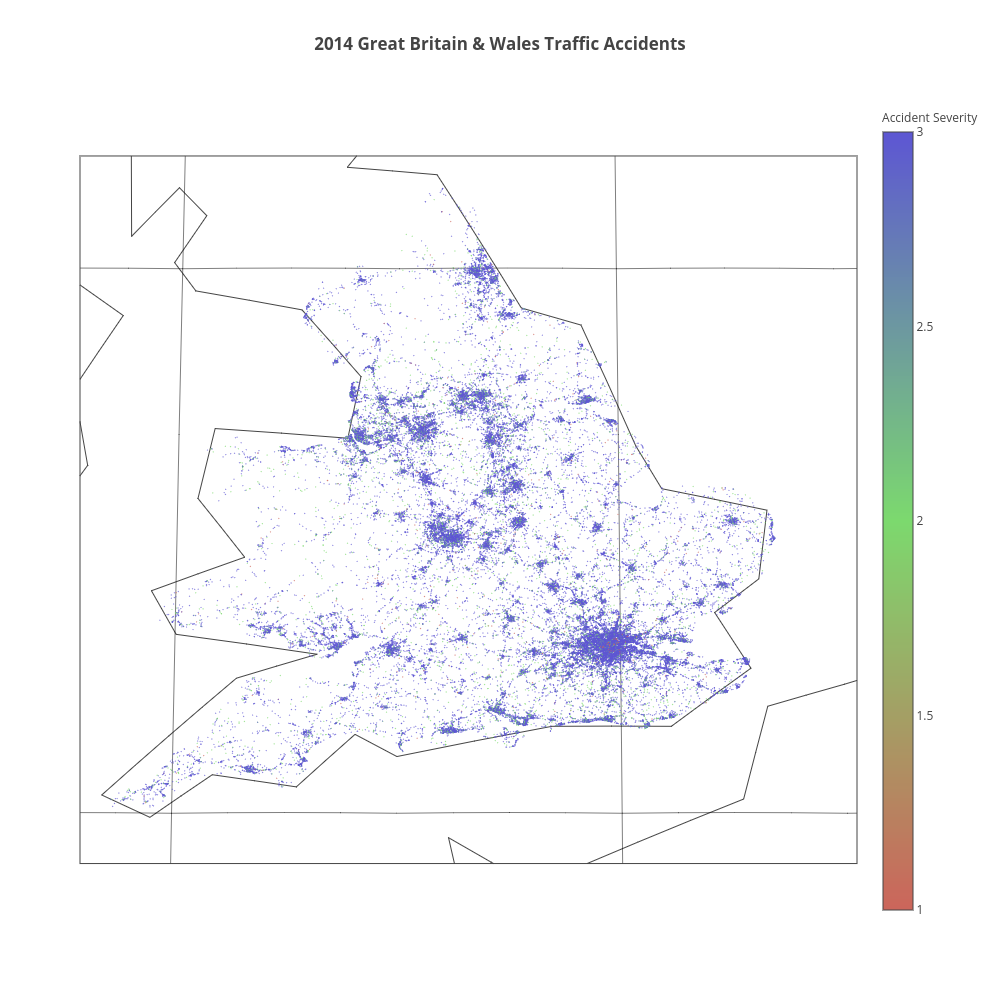

In [10]:
# ----------------------------------------------------------------------
# **Part 2: Basic Data Visualizations** (Heidi)
# This section contains basic data visualizations for the overall 
# dataset without deep analytical goals. 
# ----------------------------------------------------------------------
# ----------------------------------------------------------------------
# Part 2.1: Geographical scatterplot
# ----------------------------------------------------------------------
# initialize plotly to work offline in jupyter notebook
import plotly
plotly.tools.set_config_file(world_readable=True)
plotly.offline.init_notebook_mode(connected=True)

import plotly.plotly as py
scl = [[0,'#5D56D3'], [0.5,'#7CD96E'], [1,'#CC655B']]

data = [dict(type = 'scattergeo',
             lon = traffic_df['Longitude'],
             lat = traffic_df['Latitude'],
             mode = 'markers',
             marker = dict(
                 size = 1,
                 opacity = 0.75,
                 reversescale = True,
                 autocolorscale = False,
                 symbol = 'circle',
                 colorscale = scl,
                 color = traffic_df['Accident Severity'],
                 cmax = 3,
                 colorbar=dict(
                     title='Accident Severity')))]

layout = dict(title = '<b>2014 Great Britain & Wales Traffic Accidents</b>',
              width=1000,
              height=1000,
              geo = dict(scope = 'globe',
                         projection=dict(type='eckert4'),
                         lonaxis = dict(showgrid = True,
                                        gridwidth = 0.5,
                                        range= [-6, 2.59],
                                        gridcolor='#000000',
                                        dtick = 5),
                         lataxis = dict(showgrid = True,
                                        gridwidth = 0.5,
                                        range = [49.48, 56],
                                        gridcolor ='#000000',
                                        dtick = 5),
            showland = True,
            landcolor = 'FFFFFF',
            subunitcolor = '#E5E5E5',
            countrycolor = '#000000',
        ))

# create figure
fig = dict(data=data, layout=layout)
py.image.save_as(fig, filename='Images/2014 Traffic Accidents.png')

# display plot
py.image.ishow(fig)

## Geographic Visualization of Accidents in London
The majority of our data appeared concentrated around London, which makes
sense given that London was defined as a megacity during 2014 (Source: 
[World Population History](http://worldpopulationhistory.org/urbanization-and-the-megacity/).
Thus, it made sense to zoom in on London and see it up close.

Upon reviewing our zoomed-in map, it became clear that, while the vast
majority of accidents were Accident Severity 3 ("Slight"), there were still
non-negligible numbers of Accident Severity 2 ("Serious") accidents. In 
addition, a number of Accident Severity 1 ("Fatal") became visible, including
a possible cluster in the center of London.

The most logical explanation for the cluster is random distribution. Given that 
so many of the accidents are concentrated in the London area, it would be 
expected that we'd see a similar concentration of Serious and Fatal accidents,
at admittedly lower rates that Slight but in similar proportion, unless there
was something significantly different about road designs or traffic controls.

However, it is possible that certain areas of London (perhaps
older ones) have road designs or traffic patterns that make them more prone
to serious accidents. Review of those particular areas would be a good 
avenue for further study to see if any commonalities could be uncovered.

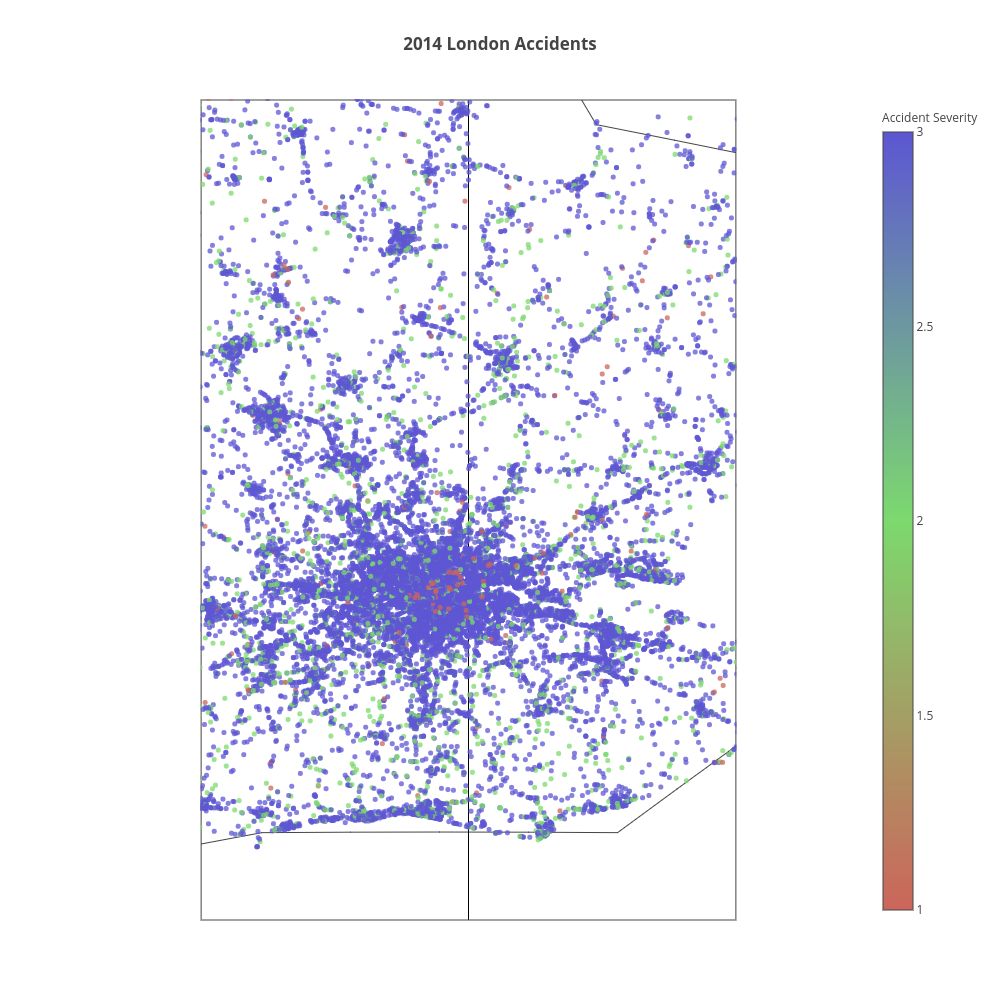

In [11]:
# ----------------------------------------------------------------------
# Part 2.1.1: Geographical scatterplot for just London
# ----------------------------------------------------------------------
data = [dict(type = 'scattergeo',
             lon = traffic_df['Longitude'],
             lat = traffic_df['Latitude'],
             mode = 'markers',
             marker = dict(
                 size = 5,
                 opacity = 0.75,
                 reversescale = True,
                 autocolorscale = False,
                 symbol = 'circle',
                 colorscale = scl,
                 color = traffic_df['Accident Severity'],
                 cmax = 3,
                 colorbar=dict(
                     title='Accident Severity'))
        )]

layout = dict(title='<b>2014 London Accidents</b>',
              width=1000,
              height=1000,
              geo = dict(scope = 'globe',
                         projection=dict(type='eckert4'),
                         lonaxis = dict(
                             showgrid = True,
                             gridwidth = 0.5,
                             range= [-1, 1],
                             gridcolor='#000000',
                             dtick = 5),
                         lataxis = dict(
                             showgrid = True,
                             gridwidth = 0.5,
                             range = [50.5, 53],
                             gridcolor ='#000000',
                             dtick = 5),
                         showland = True,
                         landcolor = 'FFFFFF',
                         subunitcolor = '#E5E5E5',
                         countrycolor = '#000000'))

# create figure
fig = dict(data=data, layout=layout)
py.image.save_as(fig, filename='Images/2014 Traffic Accidents - London Only.png')

# display plot
py.image.ishow(fig)

In [12]:
# prep for next analysis
# set up lists/dicts of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 
              'December']
monthLength_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
tripleMonthLength_list = [31, 31, 31, 28, 28, 28, 31, 31, 31, 30, 30, 30, 
                          31, 31, 31, 30, 30, 30, 31, 31, 31, 31, 31, 31,
                          30, 30, 30, 31, 31, 31, 30, 30, 30, 31, 31, 31]

## Normalized Count of Traffic Accidents by Month
In order to account for variations in month length, we made the decision
to normalize our monthly data by the number of days in each month.

From the raw data, January had the least number of accidents, and October 
had the most number of accidents. 

After normalizing, however, it became apparent that January had an unusually 
low number of accidents. Upon further research, the most likely explanation
is the severe weather than the UK experienced during January of 2014. 

According to the Met Office, "a succession of weather systems tracking across the UK 
from the Atlantic brought high winds, at times gale force, and persistent rain 
to the country" during January of 2014, resulting in flood in a number of regions
(Source: [Met Office](https://www.metoffice.gov.uk/climate/uk/summaries/2014/january)).
It makes sense that drivers would avoid being out in such weather or, quite
possibly, could not go out in such weather (given that some roadways were
reportedly flooded), thus resulting in a lower accident count purely because
of fewer drivers on the road.

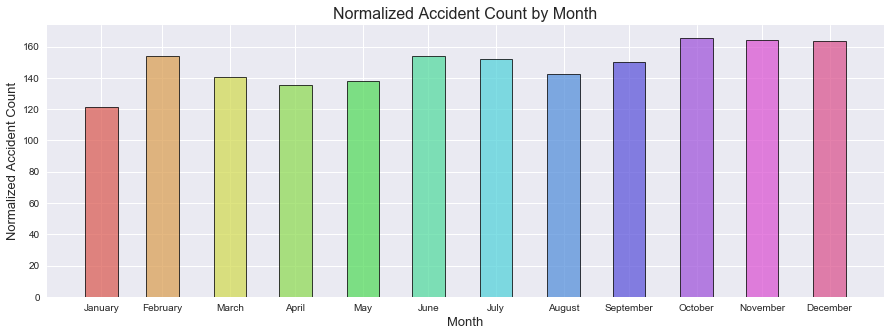

,Date,Accident Count,Month Length (Num Days)
0,January,3764,31
1,February,4318,28
2,March,4356,31
3,April,4056,30
4,May,4286,31
5,June,4619,30
6,July,4706,31
7,August,4414,31
8,September,4504,30
9,October,5132,31


In [13]:
# ----------------------------------------------------------------------
# Part 2.2: Count of Traffic Accidents by Month
# ----------------------------------------------------------------------

# set up data
trafficDataByMonth_df = traffic_df[['Date', 'Accident Index']].copy()
trafficDataByMonth_df.index = trafficDataByMonth_df['Date']
trafficDataByMonth_df = pd.DataFrame(trafficDataByMonth_df.resample('M').count()['Accident Index'])
trafficDataByMonth_df = trafficDataByMonth_df.reset_index()[['Date', 
                                                             'Accident Index']]
trafficDataByMonth_df.rename(columns={'Accident Index':'Accident Count'}, 
                             inplace=True )

# add length column to allow normalization by month lengths
trafficDataByMonth_df['Month Length (Num Days)'] = monthLength_list

# create bar plot
sns.set()
plt.rcParams['figure.figsize'] = [15,5]
plt.bar(trafficDataByMonth_df['Date'], 
        trafficDataByMonth_df['Accident Count']/trafficDataByMonth_df['Month Length (Num Days)'], 
        color=twelveColorPalette, width=15, align='center', linewidth=1, 
        edgecolor='black', tick_label=month_list, alpha=0.75)
plt.title("Normalized Accident Count by Month", size=16)
plt.xlabel("Month", size=13)
plt.ylabel("Normalized Accident Count", size=13)
plt.savefig('Images/normalizedAccidentByMonth.png')

# change date column to month names
trafficDataByMonth_df['Date'] = month_list

# display results
plt.show()
trafficDataByMonth_df

## Accident Severity by Month
### Accident Severity by Month (v.1)
Next, we broke down the overall accident count by Severity in two different
visualizations: a grouped bar chart (v1) and a stacked bar chart (v2) (when the grouped
bar chart proved difficult to read). Again, all data was normalized by the
number of days in each month.

The most notable trend here was that, while the number of Severity 3 "Slight"
accidents varied month-to-month, the number of Severity 2 "Serious" and 
Severity 1 "Fatal" accidents stayed relatively steady month-to-month.

Possible explanations include bias or subjectivity in how police officers 
categorize accidents or variations in minor accidents due to effects of weather
or other seasonal events changes. It would seem, from looking at this data,
that looking more closely at the causes of minor accidents could lead to
the most actionable data vis-a-vis traffic accident reduction. Further 
investigation would be needed to determine.

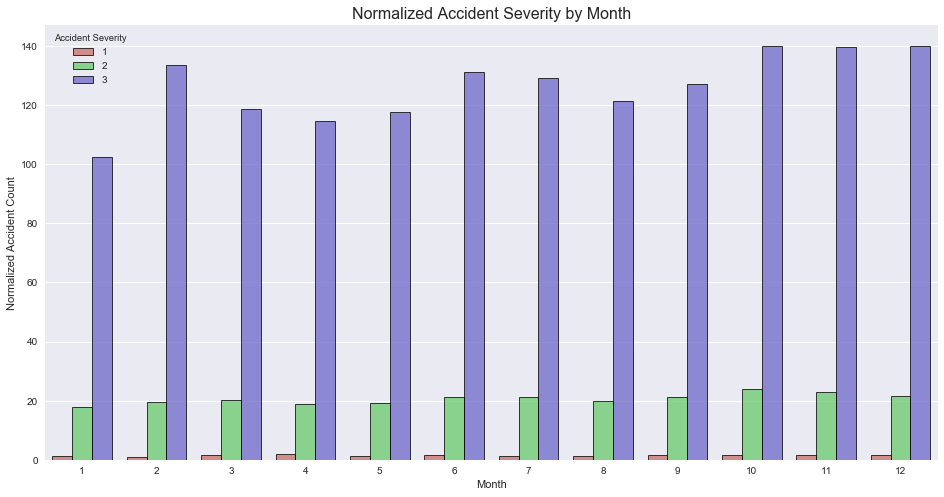

In [16]:
# ----------------------------------------------------------------------
# Part 2.3: Grouped Bar chart of severity by month
# ----------------------------------------------------------------------
# create dataframe holding all data
accSevByMonth_df = traffic_df[['Date', 'Accident Index', 'Accident Severity']].copy()
accSevByMonth_df.index = accSevByMonth_df['Date']
accSevByMonth_df['Month'] = accSevByMonth_df.index.month
accSevByMonth_df = pd.DataFrame(accSevByMonth_df.\
                                groupby(['Month', 'Accident Severity']).\
                                count()['Accident Index'])
accSevByMonth_df.reset_index(inplace=True)
accSevByMonth_df[['Month', 
                  'Accident Severity', 
                  'Accident Index']]
accSevByMonth_df.rename(columns={'Accident Index':'Accident Count'}, 
                        inplace=True)

# add month length for normalization
accSevByMonth_df['Month Length'] = tripleMonthLength_list

# normalize
accSevByMonth_df['Accident Count'] = accSevByMonth_df['Accident Count']/accSevByMonth_df['Month Length']

# create bar plot
accidentSeverityByMonth_plt = sns.barplot(x='Month', y='Accident Count', 
                                          data=accSevByMonth_df, 
                                          hue='Accident Severity', 
                                          palette=threeColorPalette, 
                                          edgecolor='black', alpha=0.75, 
                                          linewidth=1)
plt.title("Normalized Accident Severity by Month", size=16)
plt.ylabel("Normalized Accident Count")
plt.savefig('Images/normalizedAccidentSeverityByMonth.png')
plt.show(accidentSeverityByMonth_plt)

### Accident Severity by Month (v.2)

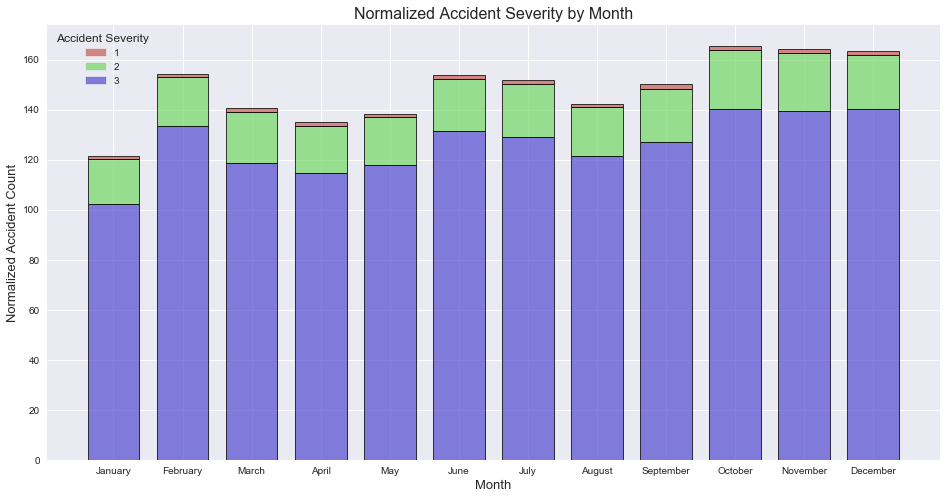

In [17]:
# create base dataframe to work with
accSevByMonth2_df = traffic_df[['Date', 'Accident Index', 'Accident Severity']].copy()
accSevByMonth2_df.index = accSevByMonth2_df['Date']
accSevByMonth2_df['Month'] = accSevByMonth2_df.index.month

# create three separate dataframes by severity (including column for normalization)
levelOneByMonth_df = pd.DataFrame(accSevByMonth2_df[accSevByMonth2_df['Accident Severity']==1].\
                                  groupby('Month').count()['Accident Index']).reset_index()
levelOneByMonth_df['Month Length'] = monthLength_list
levelTwoByMonth_df = pd.DataFrame(accSevByMonth2_df[accSevByMonth2_df['Accident Severity']==2].\
                                  groupby('Month').count()['Accident Index']).reset_index()
levelTwoByMonth_df['Month Length'] = monthLength_list
levelThreeByMonth_df = pd.DataFrame(accSevByMonth2_df[accSevByMonth2_df['Accident Severity']==3].\
                                    groupby('Month').count()['Accident Index']).reset_index()
levelThreeByMonth_df['Month Length'] = monthLength_list

# create stacked bar plot
plt.rcParams["figure.figsize"] = [16,8]
plt.bar(levelThreeByMonth_df['Month'], 
        levelThreeByMonth_df['Accident Index']/levelThreeByMonth_df['Month Length'], 
        color='#5D56D3', width=0.75, align='center', linewidth=1, 
        edgecolor='black', tick_label=month_list, alpha=0.75)
plt.bar(levelTwoByMonth_df['Month'], 
        levelTwoByMonth_df['Accident Index']/levelTwoByMonth_df['Month Length'], 
        bottom=levelThreeByMonth_df['Accident Index']/levelThreeByMonth_df['Month Length'],
        color='#7CD96E', width=0.75, align='center', linewidth=1, 
        edgecolor='black', tick_label=month_list, alpha=0.75)
plt.bar(levelOneByMonth_df['Month'], 
        levelOneByMonth_df['Accident Index']/levelOneByMonth_df['Month Length'], 
        bottom=[i+j for i,j in zip(levelThreeByMonth_df['Accident Index']/levelThreeByMonth_df['Month Length'], 
                                   levelTwoByMonth_df['Accident Index']/levelTwoByMonth_df['Month Length'])],
        color='#CC655B', width=0.75, align='center', linewidth=1, 
        edgecolor='black', tick_label=month_list, alpha=0.75)

# format bar plot
plt.title("Normalized Accident Severity by Month", size=16)
plt.xlabel("Month", size=13)
plt.ylabel("Normalized Accident Count", size=13)

# add legend
import matplotlib.patches as mpatches
sev1 = mpatches.Patch(color='#CC655B', label='1', alpha=0.75)
sev2 = mpatches.Patch(color='#7CD96E', label='2', alpha=0.75)
sev3 = mpatches.Patch(color='#5D56D3', label='3', alpha=0.75)
plt.legend(handles=[sev1, sev2, sev3], 
           loc='best', title='Accident Severity')
plt.savefig('Images/stackedSeverityByMonth.png')
plt.show()

# Traffic Accident Casulties by Week & Time of Day
## Number of Casualties by Day of Week
The objective was to determine which day of the week had the most casualties in 2014. We summed the number of casualties for each day of the week and found that Friday had the total most number of casualties while Sunday had the
least number of casualties. For further analysis, we will look at the average number of casualties for each day of the
week in order to adjust for differences in the number of days for each week day and to see potential outliers in the data. 

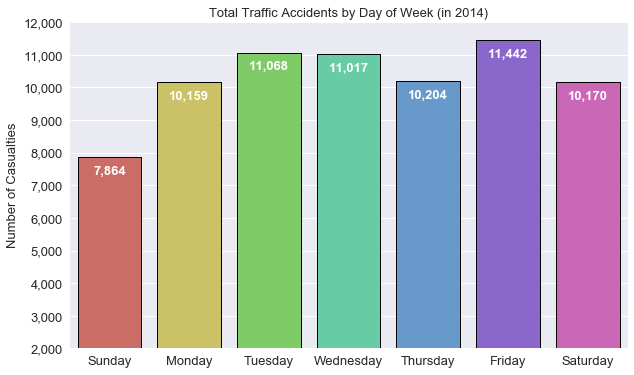

In [18]:
# ----------------------------------------------------------------------
# Part 3: TRAFFIC ACCIDENT CASUALTIES BY DAY OF WEEK AND TIME OF DAY (Dolly)
# ----------------------------------------------------------------------
# Create dataframe for Casualties by Day of Week and Hour of Day
accidents_by_weeknum = traffic_df.groupby(['Day of Week']).sum()['Number of Casualties'].to_frame().reset_index()
accidents_by_date = traffic_df.groupby(['Date', 
                                        'Day of Week', 
                                        'Month']).sum()['Number of Casualties'].to_frame().reset_index()
accidents_by_hour = traffic_df.groupby(['Day of Week',
                                        'Hour of Day']).sum()['Number of Casualties'].to_frame().reset_index()
accidents_by_hour_pivot = accidents_by_hour.pivot_table(values=['Number of Casualties'], 
                                                        index=['Hour of Day'], 
                                                        columns=['Day of Week'])
accidents_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

# Plot bars for Number of Casualties by Day of Week
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
b = sns.barplot(x='Day of Week', y='Number of Casualties', data=accidents_by_weeknum,
                palette=sevenColorPalette, linewidth=1, edgecolor='black')

# Define x_axis for xticks
x_axis = np.arange(0,7,1)

# Calculate upper bound of y-axis
y_max = max(accidents_by_weeknum['Number of Casualties'])
# round the upper bound of y-axis up to nearest thousand
y_max -= y_max % -1000
step = 1000
y_axis = np.arange(2000, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

#plt.tick_params(axis='y', which='major', direction='out', length=2, color='gray')
plt.xticks(x_axis, ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize=13)

# Add Data Labels for bar values
ax = b.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}".format(p.get_height()), xy=((p.get_x() + p.get_width() / 2., p.get_height()-500)),
                ha='center', va='center', color='white', xytext=(0, 2), 
                textcoords='offset points', weight='bold', fontsize=13)  

plt.title('Total Traffic Accidents by Day of Week (in 2014)', fontsize=13)
plt.savefig('Images/2014-accidents-by-dayofweek.png')
plt.show()

## Distribution in Number of Casualties in a day for each day of the week
By looking at the distribution of daily traffic accident casualties for each day of the week, we were able 
to determine that Friday had the highest median number of Casualties followed by Tuesday with the second 
highest median. The box-and-whisker plot also allows us to see that outliers ahd a great impact for Wednesday.
We can see that a few outliers on the higher end in number of casualties contributed to bringing up Wednesday's 
overall number of casualties for 2014.

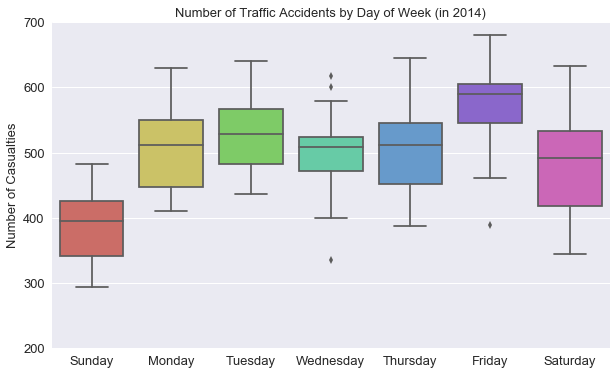

In [19]:
# Plot boxplot showing average number of casualties by day of week
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.boxplot(x='Day of Week', y='Number of Casualties', data=accidents_by_date, 
            palette=sevenColorPalette)

# Define x_axis for xticks
x_axis = np.arange(0,7,1)

# Calculate upper bound of y-axis
y_max = 700
step = 100
y_axis = np.arange(200, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]

plt.ylim(min(y_axis), max(y_axis))

#plt.tick_params(axis='y', which='major', direction='out', length=2, color='gray')
plt.xticks(x_axis, ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize=13)

plt.title('Number of Traffic Accidents by Day of Week (in 2014)', fontsize=13)
plt.savefig('Images/2014-boxplot-accidents-per-dayofweek.png')
plt.show()

## Traffic Accident Casualties by Time of Day
For time of day analysis, we separated weekdays and weekends to see what patterns we could find between the 
number of traffic accidents and hour of day for each day of the week. As expected, we found that for weekdays 
the number of casualties peaked during the typical commute hours, 8AM and 5PM, for each day. For weekends, the 
trends are different from weekdays as we see a less defined peak in the number of casualties at around 12PM. 
After 12PM, the number of casualties slowly decreases for the weekend days. 

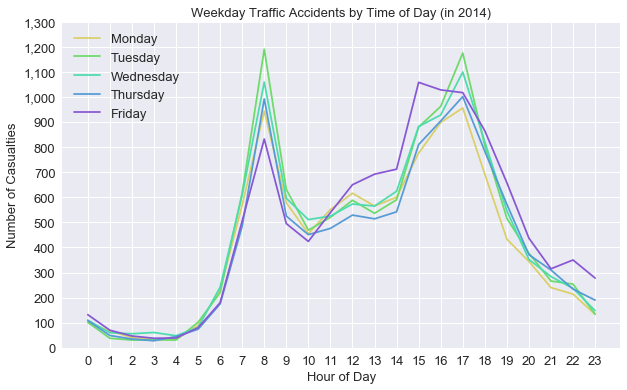

In [20]:
# Create line charts showing trends in the Time of Day and Number of Casualties 
# Set x_axis
x_axis = accidents_by_hour_pivot.index

# Plot each weekday and assigning color to be consistent with previous charts
plt.figure(figsize=(10,6))
plt.plot(x_axis, accidents_by_hour_pivot['Monday'], color='#DACF68')
plt.plot(x_axis, accidents_by_hour_pivot['Tuesday'], color='#6CDB69')
plt.plot(x_axis, accidents_by_hour_pivot['Wednesday'], color='#4CDCAE')
plt.plot(x_axis, accidents_by_hour_pivot['Thursday'], color='#559BD6')
plt.plot(x_axis, accidents_by_hour_pivot['Friday'], color='#8757D4')

# Determine y-axis
y_max = 1300
step = 100
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(fontsize=13, loc='upper left')
plt.title("Weekday Traffic Accidents by Time of Day (in 2014)", fontsize=13)
plt.savefig('Images/2014-weekday-accidents-by-hour.png')
plt.show()

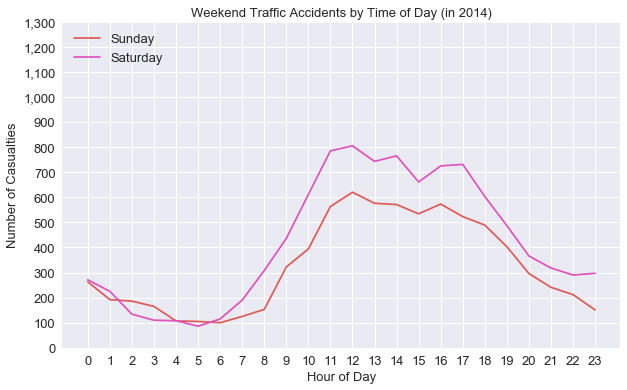

In [21]:
# Plot for Weekends
plt.figure(figsize=(10,6))
plt.plot(accidents_by_hour_pivot['Sunday'], color='#DD5B58')
plt.plot(accidents_by_hour_pivot['Saturday'], color='#DE54BB')

# Determine y-axis
y_max = 1300
step = 100
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Number of Casualties', fontsize=13)

plt.legend(fontsize=13, loc='upper left')
plt.title("Weekend Traffic Accidents by Time of Day (in 2014)", fontsize=13)
plt.savefig('Images/2014-weekend-accidents-by-hour.png')
plt.show()

## Rural vs Urban Traffic Accident Casualties and Severity
By separating rural and urban accidents, we found that ~63% of casualties in our dataset are from urban areas. We also found that 
most urban casualties were less severe with severity rating of 3. Compared to urban areas, rural areas had much traffic accidents with 
much more varied severity. Despite only contributing 37% of the casualties in our data, rural accidents with severity rating of 2 
made up 7% of total casualties, and rural accidents with severity rating of 1 (the most severe) made up 1% of total casualties. When
compared to rural areas, urban areas had a similar number of accidents with severity of 2 but had only a third of the number of accidents 
that rural areas had with severity of 1. 

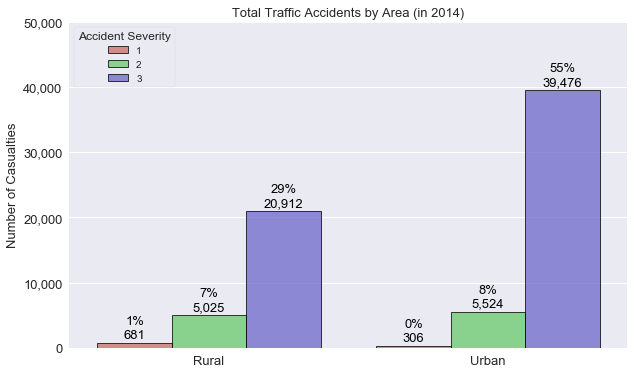

In [22]:
# Create Dataframe for Urban or Rural Area, Road Type and sum for Number of Casualties
area_road_type = traffic_df.groupby(['Urban or Rural Area',
                                     'Road Type',
                                    'Accident Severity']).sum()['Number of Casualties'].to_frame().reset_index()

# Convert Urban or Rural Area (1 or 2) raw data for respective area
area_road_type['Urban or Rural Area'] = [str('Urban') if value==1 else str('Rural') if value==2 else str('Neither') 
                                         for value in area_road_type['Urban or Rural Area']]
area_type = area_road_type.groupby(['Urban or Rural Area', 'Accident Severity']).sum()['Number of Casualties'].to_frame().reset_index()
total_casualties = area_type['Number of Casualties'].sum()

road_type = area_road_type.groupby(['Urban or Rural Area', 'Road Type']).sum()['Number of Casualties'].to_frame().reset_index()
urban_road = road_type.loc[road_type['Urban or Rural Area']=='Urban',:].sort_values('Number of Casualties', 
                                                                                    ascending=False)
rural_road = road_type.loc[road_type['Urban or Rural Area']=='Rural',:].sort_values('Number of Casualties', 
                                                                                    ascending=False)


plt.figure(figsize=(10,6))
g = sns.barplot(x='Urban or Rural Area', y='Number of Casualties', hue='Accident Severity', data=area_type, 
                palette=threeColorPalette, linewidth=1, edgecolor='black', alpha=0.75)
sns.set_style('darkgrid')

# Determine y-axis
y_max = max(area_type['Number of Casualties'])+2500
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize=13)
plt.yticks(y_axis, y_axis_fmt, fontsize=13)

plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize=13)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy=((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha='center', va='center', color='black', xytext=(0, 2), 
                textcoords='offset points', fontsize=13)  
plt.legend(loc='upper left', title='Accident Severity', frameon=True)
plt.title('Total Traffic Accidents by Area (in 2014)', fontsize=13)
plt.savefig('Images/2014-accidents-by-areatype.png')
plt.show()

## Traffic Casualties by Road Type
With the Urban and Rural breakout, we also looked at casualties by road type and determined that the majority 
of traffic accidents occured on a single carriageway for both urban and rural, 78% and 69% of total urban accidents 
and total rural accidents, respectively. Dual carriageway was the second most popular road type for both urban 
and rural with 12% and 22%, respectively.

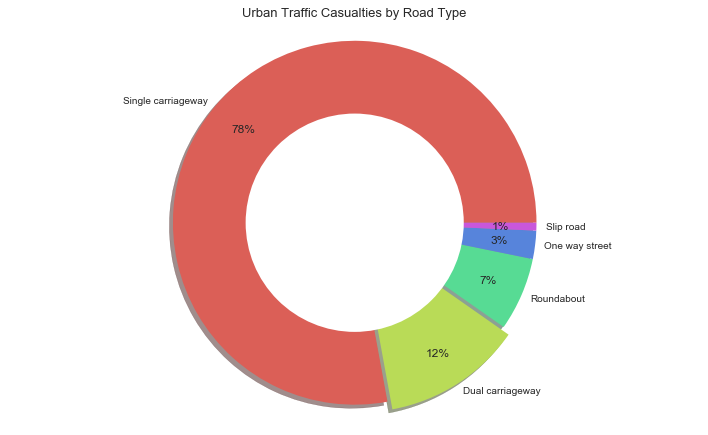

In [23]:
# Plot donuts for % of Casualties by Road Type for Urban and Rural
# Plot Urban donut
explode = (0.0,0.05,0.0,0.0,0.0)
plt.figure(figsize=(10,6))

plt.pie(urban_road['Number of Casualties'], explode=explode, labels=urban_road['Road Type'], counterclock=True,
        labeldistance=1.05, autopct='%.0f%%', pctdistance=0.8, shadow=True, colors=fiveColorPalette)

# Draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.title('Urban Traffic Casualties by Road Type', fontsize=13)
plt.savefig('Images/2014-urban-accidents-by-roadtype.png')
plt.show()

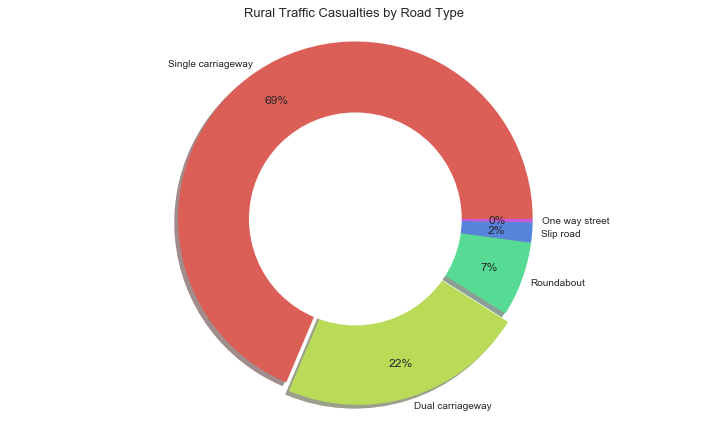

In [24]:
# Plot Rural donut
explode = (0.0,0.05,0.0,0.0,0.0)
plt.figure(figsize=(10,6))

plt.pie(rural_road['Number of Casualties'], explode=explode, labels=rural_road['Road Type'], counterclock=True,
        labeldistance=1.05, autopct='%.0f%%', pctdistance=0.8, shadow=True, colors=fiveColorPalette)

# Draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.title('Rural Traffic Casualties by Road Type', fontsize=13)
plt.savefig('Images/2014-rural-accidents-by-roadtype.png')
plt.show()

## Urban and Rural Traffic Accidents by Speed Limit
In our urban and rural analysis, we also looked at how speed limit may have played a factor in number of casualties. 
We found that the speed limits at the time of accidents were much lower in urban areas than in rural areas. 
Interestingly, most traffic accidents occured at a speed limit of 30 kilometers per hour for urban araes and 60 
kilometers per hour for rural areas.

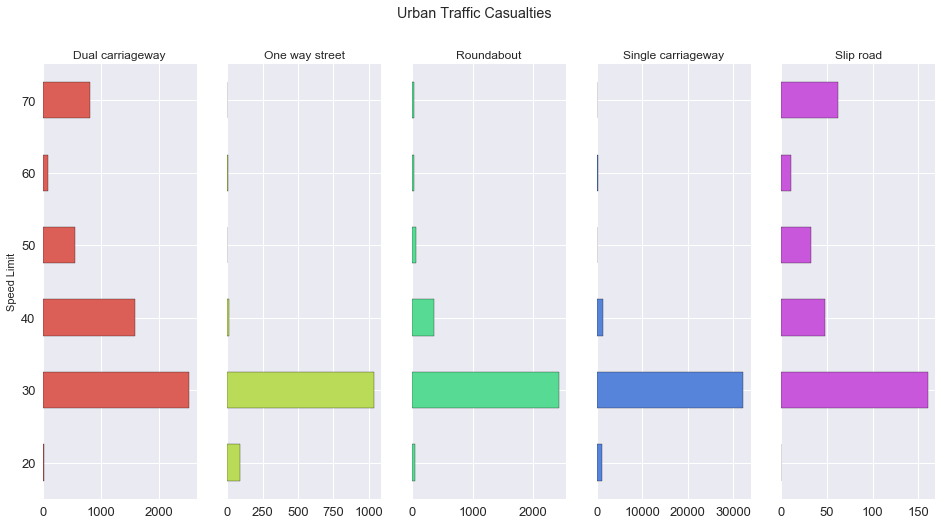

In [26]:
# Create dataframe grouped by Urban or Rural Area, Road Type, Speed Limit and sum for Number of Casualties
accidents_speed = traffic_df.groupby(['Urban or Rural Area', 
                                      'Road Type',
                                      'Speed Limit']).sum()['Number of Casualties'].to_frame().reset_index()
accidents_speed = accidents_speed.sort_values('Number of Casualties')
# Convert Urban or Rural Area (1 or 2) raw data for respective area
accidents_speed['Urban or Rural Area'] = [str('Urban') if value==1 else str('Rural') if value==2 else str('Neither') 
                                         for value in accidents_speed['Urban or Rural Area']]

# Create table for Urban traffic accidents and their speed limits and road types
urban_accidents_speed = accidents_speed.loc[accidents_speed['Urban or Rural Area']=='Urban',:]
urban_accidents_speed = urban_accidents_speed.pivot_table(values='Number of Casualties', 
                                                          index='Speed Limit', 
                                                          columns='Road Type', 
                                                          aggfunc=np.sum,
                                                          fill_value=0)
# Plot horizontal bar chart for Urban
urban_accidents_speed.plot(kind='barh', subplots=True, sharex=False, sharey=True,
                           title='Urban Traffic Casualties', legend=False, fontsize=13,
                           layout=(1,5), stacked=False, color=fiveColorPalette, edgecolor='black')
plt.ylabel('Speed Limit (km)', fontsize=13)
plt.savefig('Images/2014-urban-accidents-by-speedlimit.png')
plt.show()

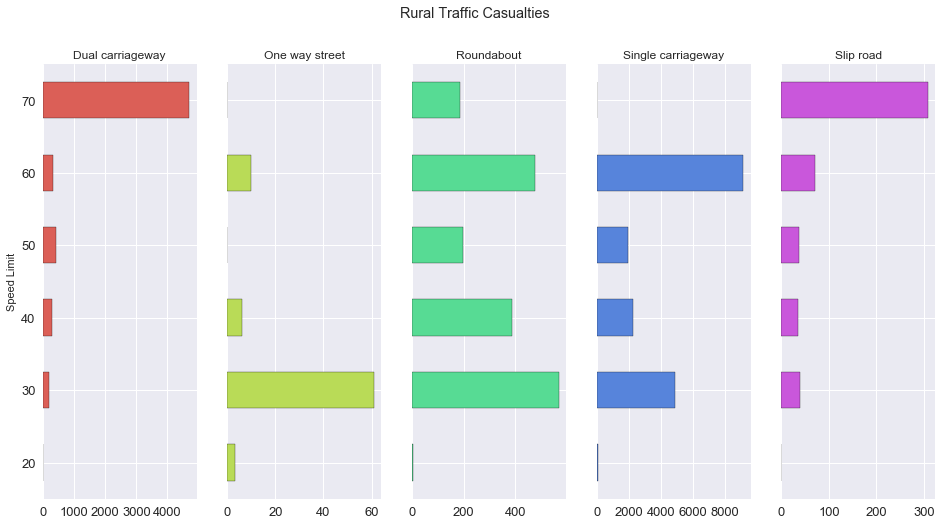

In [27]:
# Create table for Rural traffic accidents and their speed limits and road types
rural_accidents_speed = accidents_speed.loc[accidents_speed['Urban or Rural Area']=='Rural',:]
rural_accidents_speed = rural_accidents_speed.pivot_table(values='Number of Casualties', 
                                                          index='Speed Limit', 
                                                          columns='Road Type', 
                                                          aggfunc=np.sum,
                                                          fill_value=0)
# Plot horizontal bar chart for Rural
rural_accidents_speed.plot(kind='barh', subplots=True, sharex=False, sharey=True, 
                           title='Rural Traffic Casualties', legend=False, fontsize=13,
                           layout=(1,5), stacked=True, color=fiveColorPalette, edgecolor='black')
plt.ylabel('Speed Limit (km)', fontsize=13)
plt.savefig('Images/2014-rural-accidents-by-speedlimit.png')
plt.show()

# Rural vs. Urban Data Visualization and Analysis

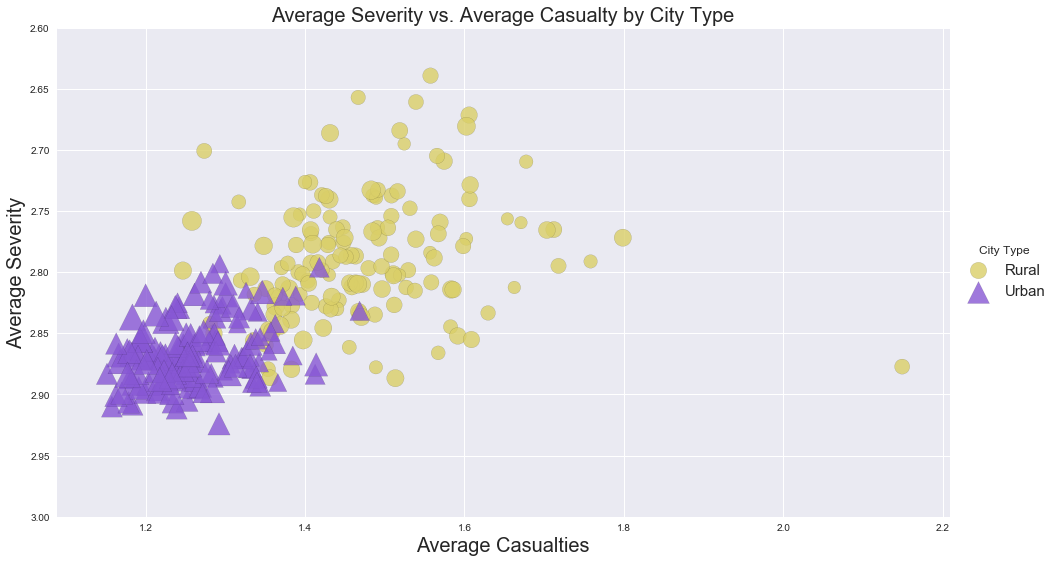

In [29]:
# ----------------------------------------------------------------------
# Part 4: Rural vs. Urban Data Visualization and Analysis (Charles)
# ----------------------------------------------------------------------

#--------------- Create Data Frames for Urban v. Rural --------------- 
urban = traffic_df[traffic_df["Urban or Rural Area"] == 1]
rural = traffic_df[traffic_df["Urban or Rural Area"] == 2]

#--------------- Calculations by City Type --------------- 
rural_mean_1 = rural.groupby(["Date"]).mean()["Accident Severity"]
rural_mean_2 = rural.groupby(["Date"]).mean()["Number of Casualties"]
rural_count_3 = rural.groupby(["Date"]).count()["Accident Index"]

urban_mean_1 = urban.groupby(["Date"]).mean()["Accident Severity"]
urban_mean_2 = urban.groupby(["Date"]).mean()["Number of Casualties"]
urban_count_3 = urban.groupby(["Date"]).count()["Accident Index"]

#--------------- Set Parameters for Scatterplot --------------- 
plt.rcParams["figure.figsize"] = [16,9]
sns.set()

plt.title("Average Severity vs. Average Casualty by City Type", size=20)
plt.ylabel("Average Severity", size=20)
plt.xlabel("Average Casualties", size=20)
plt.ylim([3, 2.6])
plt.scatter(rural_mean_2,
            rural_mean_1,
            color="#DACF68",
            s=rural_count_3*2,
            edgecolor="black", linewidths= 0.1,
            alpha=0.8, label="Rural")

plt.scatter(urban_mean_2,
            urban_mean_1,
            color="#8757D4",
            s=urban_count_3*2,
            edgecolor="black", linewidths=0.1, marker="^", 
            alpha=0.8, label="Urban")

#--------------- Set Legend --------------- 
plt.legend(title='City Type', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)

#--------------- Save and Show --------------- 
plt.savefig('Images/Severity and Casualty by City Type.png')
plt.show()

## Observations

1. Urban Accidents means throughout the year are typically closer to 3 and casualties are usually closer to 1.
This is likely due to the fact that more "fender benders" occur, which are low-intensity low-casualty events.

2. Rural accidents occur much less frequently than urban accidents (on an absolute basis).
This makes it possible for high casualty, high severity accidents to influence the overall mean for the day,
pushing them higher.

3. "One is less likely to get into an accident in a rural setting, 
but if an accident is to occur it is likely to be more severe."

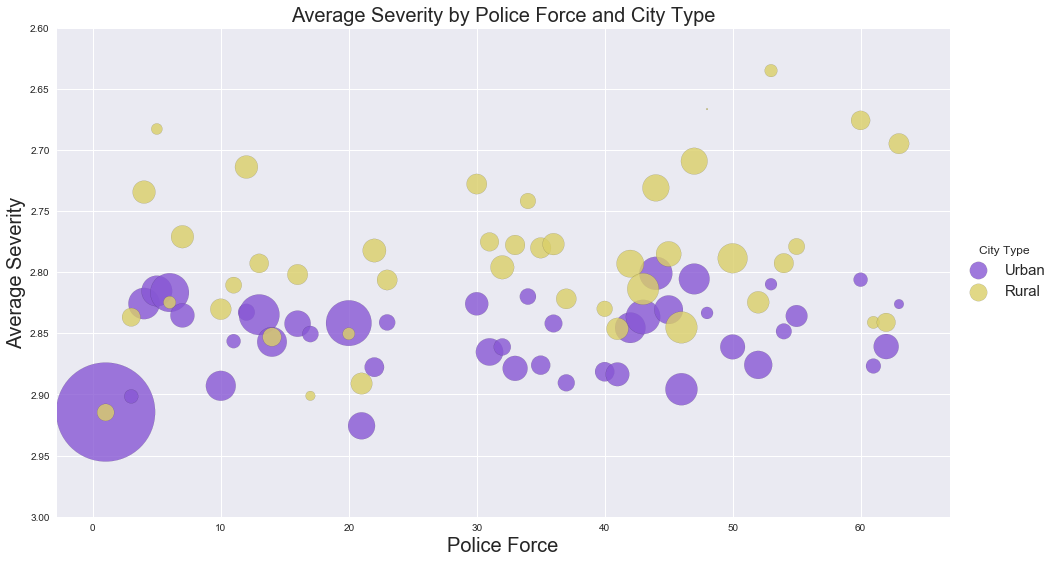

In [30]:
urban = traffic_df[traffic_df["Urban or Rural Area"] == 1]
rural = traffic_df[traffic_df["Urban or Rural Area"] == 2]

police_severity_urban = list(urban.groupby(["Police Force"]).mean()["Accident Severity"])
police_casualty_urban = list(urban.groupby(["Police Force"]).count()["Number of Casualties"])
police_force_urban = list(urban["Police Force"].unique())
police_force_urban.sort()
                             
police_severity_rural = list(rural.groupby(["Police Force"]).mean()["Accident Severity"])
police_casualty_rural = list(rural.groupby(["Police Force"]).count()["Number of Casualties"])
police_force_rural = list(rural["Police Force"].unique())
police_force_rural.sort()

#--------------- Set Parameters for Scatterplot ---------------
plt.rcParams["figure.figsize"] = [16,9]

plt.title("Average Severity by Police Force and City Type", size=20)
plt.ylabel("Average Severity", size=20)
plt.xlabel("Police Force", size=20)
plt.ylim([3, 2.6])

plt.scatter(police_force_urban,
            police_severity_urban, 
            color="#8757D4",
            s=police_casualty_urban,
            edgecolor="black", linewidths= 0.1,
            alpha=0.8, label="Urban")


plt.scatter(police_force_rural,
            police_severity_rural, 
            color="#DACF68",
            s=police_casualty_rural,
            edgecolor="black", linewidths= 0.1,
            alpha=0.8, label="Rural")

#--------------- Set Legend --------------- 
legend = plt.legend(title='City Type', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
legend.legendHandles[0]._sizes = [300]
legend.legendHandles[1]._sizes = [300]

#--------------- Save and Show --------------- 
plt.savefig('Images/Severity and Casualty by Police Force.png')
plt.show()

## Observations

1. A similar pattern emerges when looking at the data through average severity and rate of casualty 
continues to be higher in rural settings than urban settings.

2. There does not appear to be a strong correlation between average severity/casualties 
compared to Police Force.

3. It is evident that some Police Forces encounter far less accidents. Typically, these have a
higher tendency of demonstrating a higher average severity/casualty rate.

# Weather and Other Road Conditions & Traffic Accidents
## Weather and Severity Correlation 

Analysis: Comparing correlation between Severity and Weather Condition.

Process: Mapping out what type of weather resulted in the highest kind of severity

Information: 1 - Fatal | 2 - Serious | 3 - Slight |Highest means good and Lowest means bad.

Trend: Highest Severity was caused during a weather without high winds. | Lowest was during Snow and Fog weather

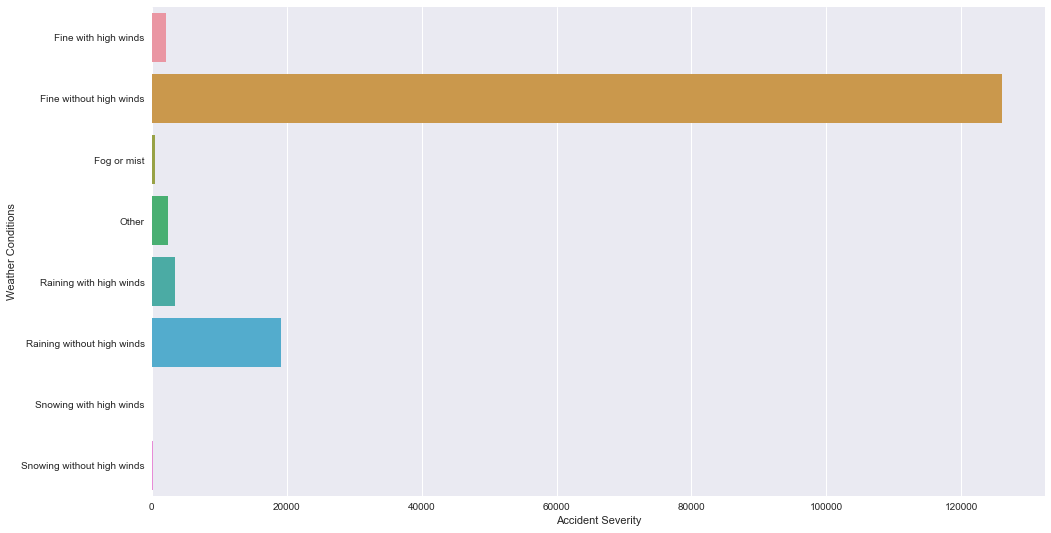

In [36]:
# ----------------------------------------------------------------------
# Part 5: Pratham
# ----------------------------------------------------------------------

grouper_1 = traffic_df[['Weather Conditions','Accident Severity']]
weather_severity = grouper_1.groupby(by = 'Weather Conditions',as_index=False).sum()
plt = sns.barplot(weather_severity['Accident Severity'],weather_severity['Weather Conditions'])
pl.savefig('Images/Weather and Severity Correlation.png')# # Severity and Weather Correlation


# Accident Severity and Weather Correlation
Analysis: Comparing correlation between Severity and Weather Condition.

Process: Cross referencing our previous findings by grouping the same data by Severity and seeing if the data is accurate.

Information: 1 - Fatal | 2 - Serious | 3 - Slight |Highest means good and Lowest means bad.

Trend: Lots of entries of severity 3 and less of severity of 1. 

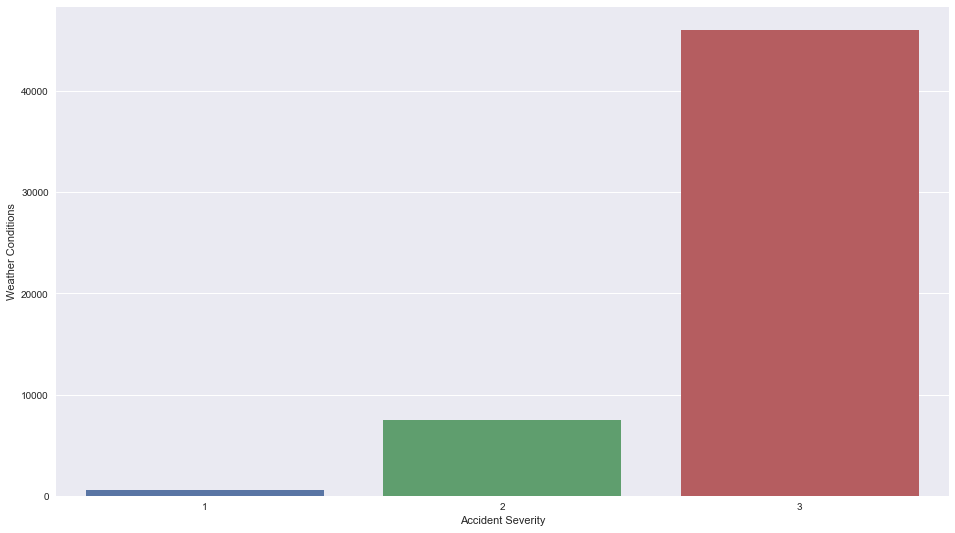

In [35]:
grouper_a = traffic_df[['Weather Conditions','Accident Severity']]
weather_severity_1 = grouper_a.groupby(by = 'Accident Severity',as_index=False).count()
plt1 = sns.barplot(weather_severity_1['Accident Severity'],weather_severity_1['Weather Conditions'])
pl.savefig('Images/Severity and Weather Correlation.png')

## Light Condition and Severity Correlation

Analysis: Comparing correlation between Severity and Light Condition.

Process: Mapping out what type of weather resulted in the highest kind of severity.

Information: 1 - Fatal | 2 - Serious | 3 - Slight |Highest means good and Lowest means bad.

Trend: Highest Severity was caused during Daylight. | Lowest was during Darkness with dim street lights.

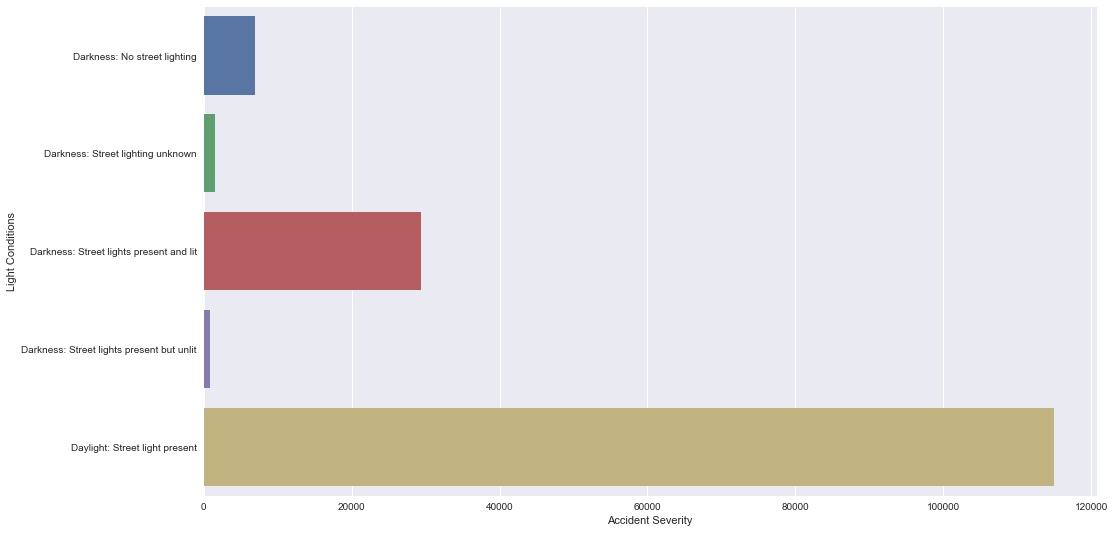

In [38]:
grouper_2 = traffic_df[['Light Conditions','Accident Severity']]
light_condition_severity = grouper_2.groupby(by = 'Light Conditions',as_index=False).sum()
plt = sns.barplot(light_condition_severity['Accident Severity'],light_condition_severity['Light Conditions'])
pl.savefig('Images/Light Condition and Severity Correlation')

## Severity Condition and Light Condition

Analysis: Comparing correlation between Severity and Weather Condition.

Process: Cross referencing our previous findings by grouping the same data by Severity and seeing if the data is accurate.

Information: 1 - Fatal | 2 - Serious | 3 - Slight |Highest means good and Lowest means bad.

Trend: Lots of entries of severity 3 and less of severity of 1. 

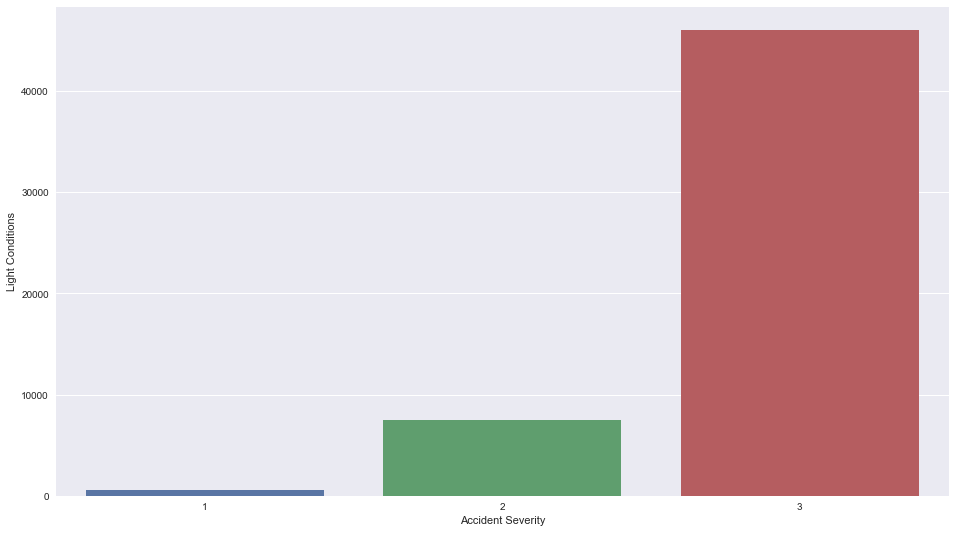

In [40]:
grouper_b = traffic_df[['Light Conditions','Accident Severity']]
light_condition_severity_1 = grouper_b.groupby(by = 'Accident Severity',as_index=False).count()
plt = sns.barplot(light_condition_severity_1['Accident Severity'],light_condition_severity_1['Light Conditions'])
pl.savefig('Images/Severity Condition and Light Condition')

## Road Type and Severity Correlation

Analysis: Comparing correlation between Severity and Road type.

Process: Mapping out what type of weather resulted in the highest kind of severity.

Information: 1 - Fatal | 2 - Serious | 3 - Slight |Highest means good and Lowest means bad.

Trend: Highest Severity was caused during Single Carriageway. | Lowest was during Darkness with slim road.

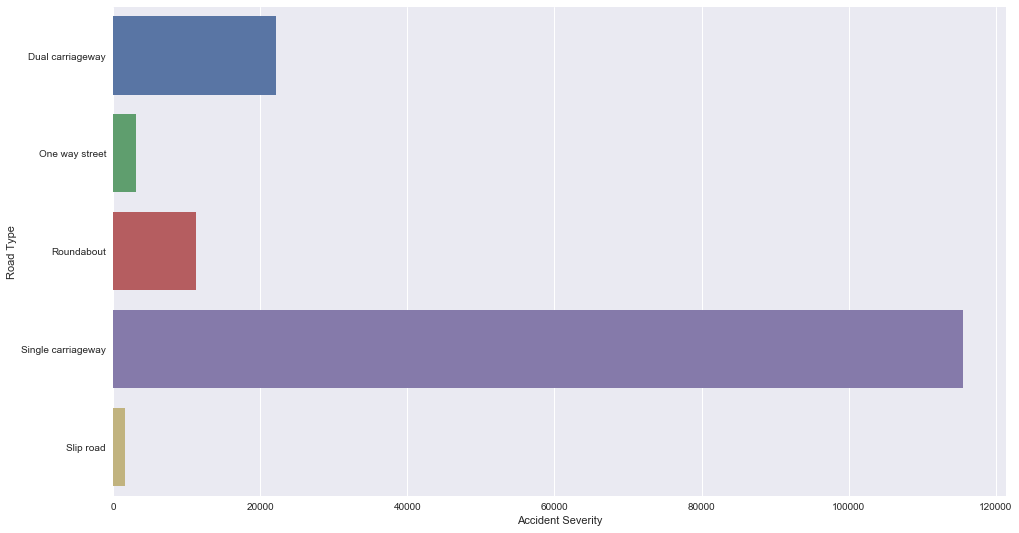

In [41]:
grouper_3 = traffic_df[['Road Type','Accident Severity']]
road_type_severity = grouper_3.groupby(by = 'Road Type',as_index=False).sum()
plt = sns.barplot(road_type_severity['Accident Severity'],road_type_severity['Road Type'])
pl.savefig('Images/Road Type and Severity Correlation')

## Severity and Road Type Correlation

Analysis: Comparing correlation between Severity and Weather Condition.

Process: Cross referencing our previous findings by grouping the same data by Severity and seeing if the data is accurate.

Information: 1 - Fatal | 2 - Serious | 3 - Slight |Highest means good and Lowest means bad.

Trend: Lots of entries of severity 3 and less of severity of 1. 

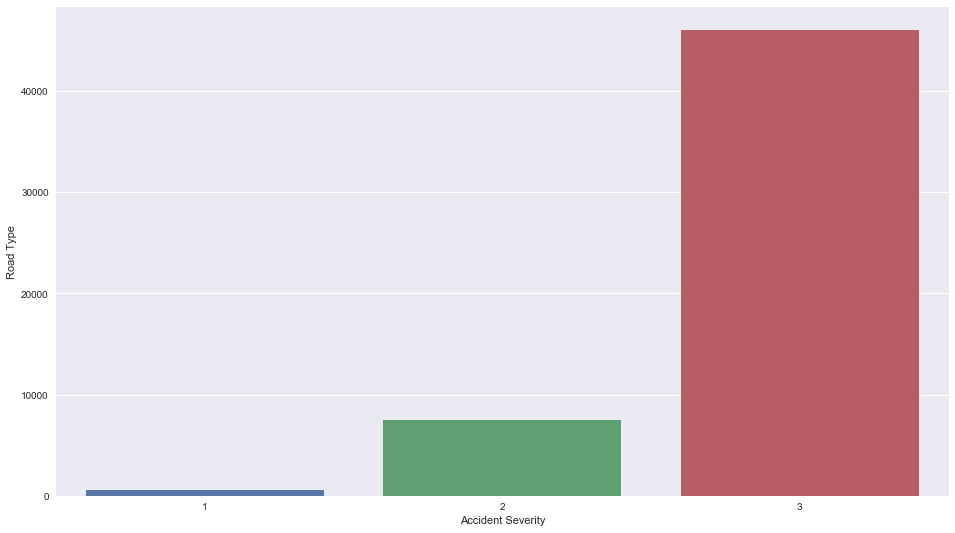

In [42]:
grouper_c = traffic_df[['Road Type','Accident Severity']]
road_type_severity_1 = grouper_c.groupby(by = 'Accident Severity',as_index=False).count()
plt = sns.barplot(road_type_severity_1['Accident Severity'],road_type_severity_1['Road Type'])
pl.savefig('Images/Severity and Road Type Correlation')

## Converting Weather Condition to Numbers 

Process: converting weather string data to numbers to train the machine learning algorithm

In [44]:
weather_condition_number_list = []

for condition in traffic_df['Weather Conditions']:
    
    if (condition == 'Fine without high winds'):
        weather_condition_number_list.append(3)
        
    if (condition == 'Raining without high winds'):
        weather_condition_number_list.append(3)
        
    if (condition == 'Raining with high winds'):
        weather_condition_number_list.append(2)
        
    if (condition == 'Other'):
        weather_condition_number_list.append(2)
        
    if (condition == 'Fine with high winds'):
        weather_condition_number_list.append(2)
        
    if (condition == 'Fog or mist'):
        weather_condition_number_list.append(1)
    
    if (condition == 'Snowing without high winds'):
        weather_condition_number_list.append(1)
        
    if (condition == 'Snowing with high winds'):
        weather_condition_number_list.append(1)

## Converting Road Type to Numbers

process: converting Road Type string data to numbers to train the machine learning algorithm

In [46]:
road_type_number_list = []

traffic_df['Road Type'].value_counts()

for road in traffic_df['Road Type']:
    
    if (road == 'Single carriageway'):
        road_type_number_list.append(3)
    
    if (road == 'Dual carriageway'):
        road_type_number_list.append(3)
        
    if (road == 'Roundabout'):
        road_type_number_list.append(2)
        
    if (road == 'One way street'):
        road_type_number_list.append(2)
        
    if (road == 'Slip road'):
        road_type_number_list.append(1)

## Light Conditions to Numbers

process: converting Light Condition string data to numbers to train the machine learning algorithm

In [47]:
light_condition_number_list = []

for condition in traffic_df['Light Conditions']:
    
    if (condition == 'Daylight: Street light present'):
        light_condition_number_list.append(3)

    if (condition == 'Darkness: Street lights present and lit'):
        light_condition_number_list.append(3)
        
    if (condition == 'Darkness: No street lighting'):
        light_condition_number_list.append(2)
        
    if (condition == 'Darkness: Street lighting unknown'):
        light_condition_number_list.append(1)
        
    if (condition == 'Darkness: Street lights present but unlit'):
        light_condition_number_list.append(1)

In [48]:
#appending it into a data frame

training_data = pd.DataFrame({'Weather':weather_condition_number_list,
                              'Road Type':road_type_number_list,
                              'Light Condition':light_condition_number_list                          
                              })


## Test Data

process: using random function to generate test data for the prediction algorithm

In [51]:
import random    

weather_testing = []
road_testing = []
light_testing = []

for i in range (54147):    

    weather_testing.append(random.randrange(0,4,1))  
    road_testing.append(random.randrange(0,4,1))
    light_testing.append(random.randrange(0,4,1))  

    weather_testing.append(random.randrange(0,8,1))  
    road_testing.append(random.randrange(0,5,1))
    light_testing.append(random.randrange(0,5,1))  

In [52]:
#process: appending it to a set of 3 to create test data
test_data = []
for i in range(54147):
    temp=[]
    temp.append(weather_testing[i])
    temp.append(road_testing[i])
    temp.append(light_testing[i])
    test_data.append(temp)      

## Training Algorithm

Creating a classifier|training the algorithm|Testing the algorithm

In [54]:
X = training_data[['Weather','Road Type','Light Condition']]
Y = traffic_df['Accident Severity']
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
prediction = clf.predict(test_data)

In [55]:
# # Test Labels



# # Exporting the CSV

csv_data = pd.DataFrame({'Weather Conditions': weather_condition_number_list, 
                         'Road Type': road_type_number_list,
                         'Light Condition': light_condition_number_list,
                         'Severity': traffic_df['Accident Severity']
                        })
csv_data.to_csv('Resources/regression.csv')
csv_data.head()




other_df = pd.DataFrame({'Weather Conditions': traffic_df['Weather Conditions'], 
                         'Road Type': traffic_df['Road Type'],
                         'Light Condition': traffic_df['Light Conditions'],
                         'Severity': traffic_df['Accident Severity']})
other_df.to_csv('Resources/other_file.csv')

## Test Labels
Process: Creating the test labels to measure the accuracy of the prediction model

In [57]:
test_labels = []
for i in range(0, len(traffic_df)):
    
    if(traffic_df.iloc[i]['Weather Conditions']=='Fine without high winds' or 
       traffic_df.iloc[i]['Weather Conditions']=='Raining without high winds'and
       traffic_df.iloc[i]['Road Type']== 'Single carriageway' or
       traffic_df.iloc[i]['Road Type']== 'Dual carriageway' and
       traffic_df.iloc[i]['Light Conditions']== 'Daylight: Street light present' or
       traffic_df.iloc[i]['Light Conditions']== 'Darkness: Street lights present and lit'):
        
        test_labels.append(3)
        
    if(traffic_df.iloc[i]['Weather Conditions']=='Raining with high winds' or 
       traffic_df.iloc[i]['Weather Conditions']=='Fine with high winds' or 
       traffic_df.iloc[i]['Weather Conditions']=='Other'and
       traffic_df.iloc[i]['Road Type']== 'Roundabout' or
       traffic_df.iloc[i]['Road Type']== 'One way street' and
       traffic_df.iloc[i]['Light Conditions']== 'Darkness: No street lighting'):
        
        test_labels.append(2)
        
    if(traffic_df.iloc[i]['Weather Conditions']=='Fog or mist' or 
       traffic_df.iloc[i]['Weather Conditions']=='Snowing without high winds' or 
       traffic_df.iloc[i]['Weather Conditions']=='Snowing with high winds'and
       traffic_df.iloc[i]['Road Type']== 'Slip road' and
       traffic_df.iloc[i]['Light Conditions']== 'Darkness: Street lighting unknown'or
       traffic_df.iloc[i]['Light Conditions']== 'Darkness: Street lights present but unlit'):
        
        test_labels.append(1)

## Accuracy

Using the sklearn accuracy score to measure the accuracy of the prediction model. 

In [61]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_score(test_labels[0:54147], prediction)

0.561342271963359